In [14]:
from ultralytics import YOLO

import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import cv2
import numpy as np

In [17]:
model_path = "./segment/train/weights/best.pt"

image_path = "./datasets/all/duck_0.jpeg"

img = cv2.imread(image_path)
H, W, _ = img.shape

model = YOLO(model_path)
results = model(img)

for result in results:
    for j, mask in enumerate(result.masks.data):
        # print(mask)
        mask = mask.numpy() * 255
        mask = cv2.resize(mask, (W, H))
        cv2.imwrite('./output.png', mask)


0: 448x640 1 duck, 248.9ms
Speed: 7.7ms preprocess, 248.9ms inference, 8.3ms postprocess per image at shape (1, 3, 448, 640)


In [26]:
import cv2

def combine_images(img, mask):
    # Resize mask if necessary
    if mask.shape[:2] != img.shape[:2]:
        mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

    # Convert mask to RGB if necessary
    if len(mask.shape) == 2:
        mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

    # Add the images with weights
    output = cv2.addWeighted(img, 0.8, mask, 0.2, 0)

    return output

img = cv2.imread(image_path)
mask = cv2.imread("./output.png")

output = combine_images(img, mask)

cv2.imwrite("./combined.png", output)


True

In [61]:
import cv2
import numpy as np
from ultralytics import YOLO  # Pastikan modul YOLO Anda diimport dengan benar

model_path = "./segment/train/weights/best.pt"
# image_path = "./datasets/all/duck_0.jpeg"
# image_path = "./testing/bebek_putih.webp"
image_path = "./testing/banyak-bebek-putih.jpg"

img = cv2.imread(image_path)
H, W, _ = img.shape

model = YOLO(model_path)
results = model(img)
names = model.names
# print(names)

# for r in results:
#     for c in r.boxes.cls:
#         print(r.boxes)
        # print(names[int(c)])
# # Membuat array kosong untuk menyimpan semua masker
# all_masks = []

# for result in results:
#     for j, mask in enumerate(result.masks.data):
#         mask = mask.numpy() * 255
#         mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

#         # Mengubah warna masker
#         colored_mask = np.zeros((H, W, 3), dtype=np.uint8)
#         colored_mask[mask > 0] = [0, 0, 255]  # Ganti warna di sini, misalnya [0, 255, 0] menjadi [255, 0, 0] untuk warna biru

#         all_masks.append(colored_mask)

# # Menggabungkan semua masker ke dalam satu gambar
# combined_mask = np.zeros((H, W, 3), dtype=np.uint8)
# for mask in all_masks:
#     combined_mask = cv2.bitwise_or(combined_mask, mask)

# # Menggabungkan gambar asli dengan hasil segmentasi
# result_image = cv2.bitwise_or(img, combined_mask)

# # Menyimpan gambar yang telah digabungkan
# cv2.imwrite('./output_combined_colored.png', result_image)



0: 512x640 3 ducks, 235.6ms
Speed: 4.0ms preprocess, 235.6ms inference, 6.0ms postprocess per image at shape (1, 3, 512, 640)


{0: 'duck', 1: 'swan'}


In [66]:
def segment_and_overlay(image_path):
    img = cv2.imread(image_path)
    H, W, _ = img.shape

    model_path = "./segment/train/weights/best.pt"  # Sesuaikan path model dengan kebutuhan Anda
    model = YOLO(model_path)
    results = model(img)

    # Membuat array kosong untuk menyimpan semua masker
    all_masks = []

    for result in results:
        for j, mask in enumerate(result.masks.data):
            mask = mask.numpy() * 255
            mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

            # Mengubah warna masker
            colored_mask = np.zeros((H, W, 3), dtype=np.uint8)
            colored_mask[mask > 0] = [0, 255, 0]  # Ganti warna di sini, misalnya [0, 255, 0] menjadi [255, 0, 0] untuk warna biru

            all_masks.append(colored_mask)

    # Menggabungkan semua masker ke dalam satu gambar
    combined_mask = np.zeros((H, W, 3), dtype=np.uint8)
    for mask in all_masks:
        combined_mask = cv2.bitwise_or(combined_mask, mask)

    # # Menggabungkan gambar asli dengan hasil segmentasi
    result_image = cv2.bitwise_or(img, combined_mask)
    image_name = image_path.split("/")[-1].split(".")[0]
    output_path = f'./result/{image_name}.png'

    # # Menyimpan gambar yang telah digabungkan
    # cv2.imwrite(output_path, result_image)
        
    # Konversi gambar hasil ke format yang bisa ditampilkan oleh Matplotlib (dari BGR ke RGB)
    result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

    # Tampilkan gambar menggunakan Matplotlib
    plt.imshow(result_image_rgb)
    plt.axis('off')  # Hilangkan sumbu x dan y
    plt.title(image_name)  # Tambahkan judul sesuai dengan nama gambar
    # plt.savefig(output_path)  # Simpan gambar ke file
    plt.show()  # Tampilkan gambar



0: 512x640 3 ducks, 248.0ms
Speed: 5.0ms preprocess, 248.0ms inference, 6.0ms postprocess per image at shape (1, 3, 512, 640)


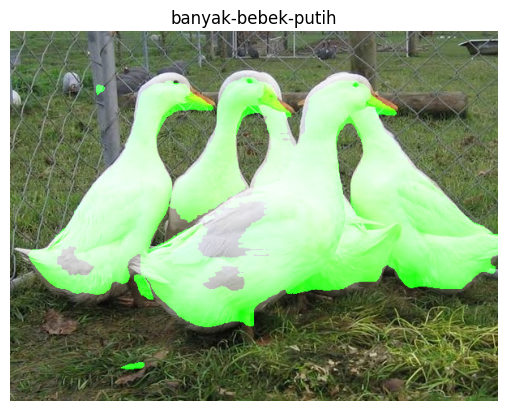


0: 416x640 3 ducks, 192.6ms
Speed: 7.3ms preprocess, 192.6ms inference, 8.5ms postprocess per image at shape (1, 3, 416, 640)


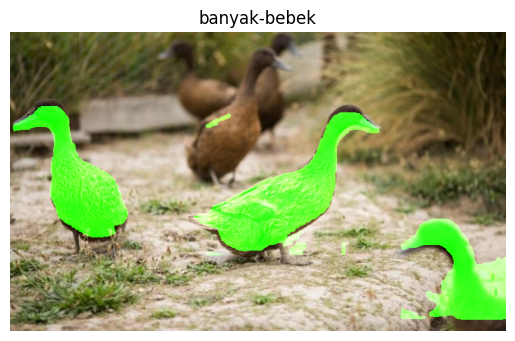


0: 448x640 2 ducks, 234.7ms
Speed: 3.0ms preprocess, 234.7ms inference, 13.0ms postprocess per image at shape (1, 3, 448, 640)


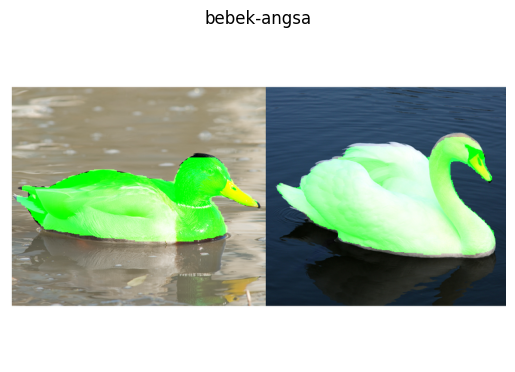


0: 640x640 1 duck, 359.1ms
Speed: 5.0ms preprocess, 359.1ms inference, 12.0ms postprocess per image at shape (1, 3, 640, 640)


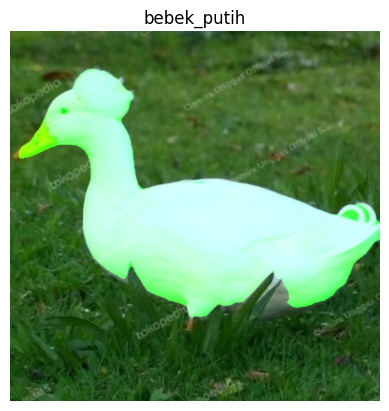


0: 640x640 5 ducks, 350.6ms
Speed: 6.0ms preprocess, 350.6ms inference, 17.0ms postprocess per image at shape (1, 3, 640, 640)


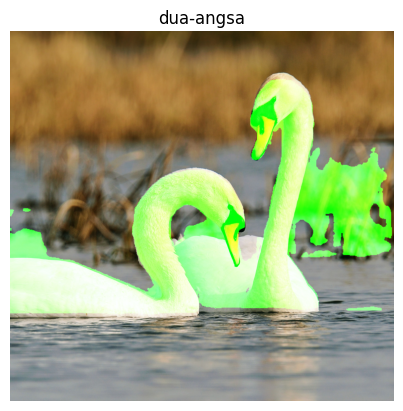

In [67]:
images_path = ['./testing/banyak-bebek-putih.jpg', './testing/banyak-bebek.jpg', './testing/bebek-angsa.png', './testing/bebek_putih.webp', './testing/dua-angsa.jpg']

for image in images_path:
    segment_and_overlay(image)